In [1]:
import numpy as np

images = np.load("data/shapes/boxes.npy").astype(np.float32)
images = np.append(images, np.load("data/shapes/circles.npy").astype(np.float32), axis=0)
images = np.append(images, np.load("data/shapes/crosses.npy").astype(np.float32), axis=0)
images = np.append(images, np.load("data/shapes/triangles.npy").astype(np.float32), axis=0)
np.random.shuffle(images)

images /= 255

print(images.shape)

(4000, 64, 64)


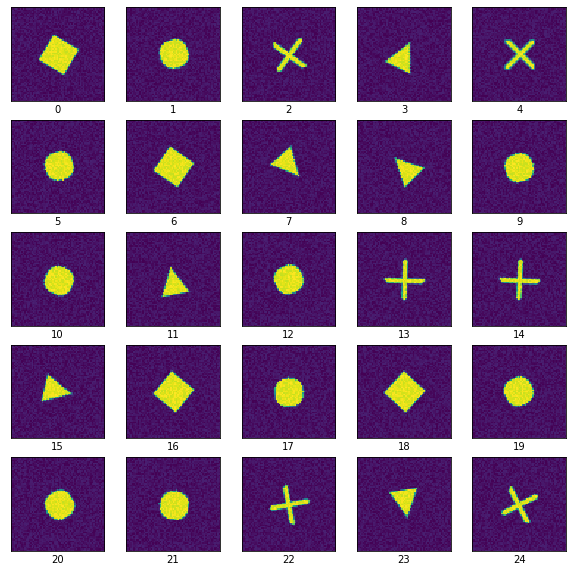

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(images[i])
    plt.xlabel(i)

In [3]:
import math
import pink

som_dim = 5
radius = (som_dim - 1) / 2
number_of_neurons = int(som_dim * som_dim - radius * (radius + 1))
neuron_dim = int(images.shape[1] / math.sqrt(2.0) * 2.0)

print("number_of_neurons = ", number_of_neurons)
print("neuron_dim = ", neuron_dim)

np_som = np.random.rand(number_of_neurons, neuron_dim, neuron_dim).astype(np.float32)
som = pink.som(np_som, som_layout="hexagonal-2d")

data = [pink.data(images[i]) for i in range(len(images))]

trainer = pink.trainer(som, pink.GaussianFunctor(sigma=0.8, damping=0.2))

number_of_neurons =  19
neuron_dim =  90


In [4]:
from tqdm import tqdm_notebook

for iter in tqdm_notebook(range(1), desc="epoch"):
    for i in tqdm_notebook(range(100), desc="train", leave=False):
        trainer(data[i])

<IPython.core.display.Javascript object>


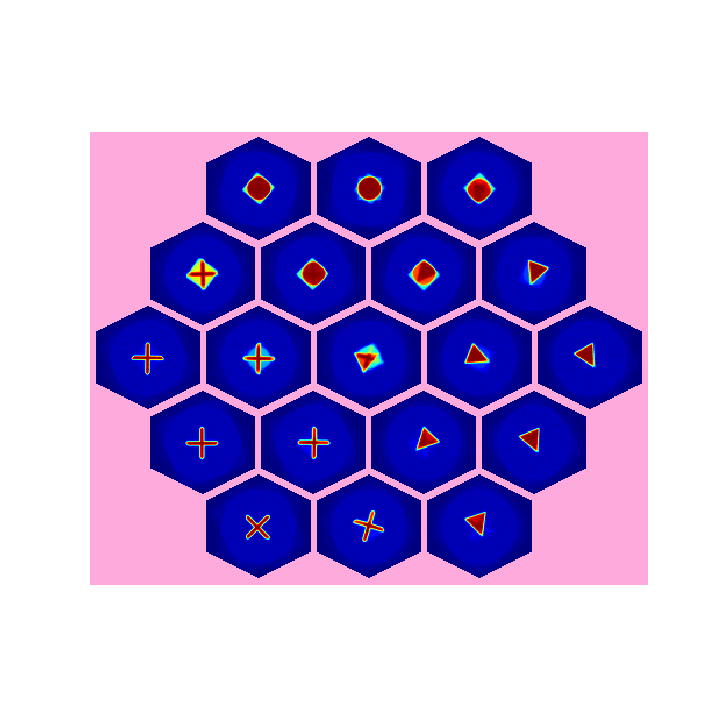

<IPython.core.display.Javascript object>


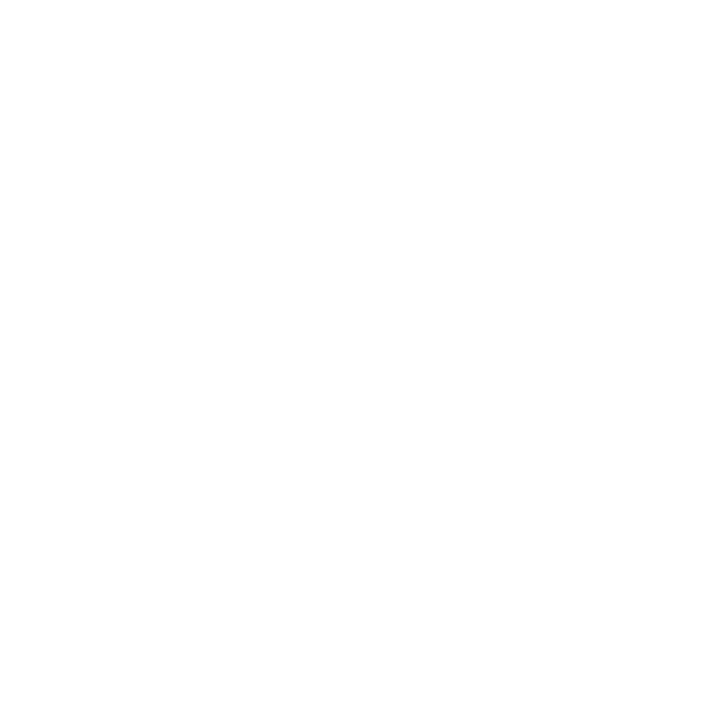

In [5]:
%matplotlib notebook
import tools
import ipywidgets as widgets
import matplotlib
from tqdm import tqdm_notebook

widgets.Checkbox(
    value=False,
    description='Interrupt',
    disabled=False
)

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
fig.show()

cmap = matplotlib.cm.get_cmap("jet")
cmap.set_bad('#ffaadd', 1.)

for iter in tqdm_notebook(range(1), desc="epoch"):
    for i in tqdm_notebook(range(len(images)), desc="train", leave=False):
        
        trainer(data[i])
        
        if not i % 100:
            trainer.update_som()

            ax.clear()
            ax.axis("off")
            ax.imshow(np.rot90(tools.show(som, border=5)), aspect=1, interpolation="nearest", cmap=cmap)
            fig.canvas.draw()